In [13]:
import pandas as pd

In [14]:
cruise=pd.read_csv('COVID-19/Cruise/Diamond_Princess_dataset_dateWise_summary.csv')
wuhan=pd.read_csv('COVID-19/Hubei/Hubei_dataset_dateWise_summary.csv')

In [21]:
cruise=cruise[['Day','Confirmed']]
wuhan=wuhan[['Day','Confirmed']]

In [22]:

def percent_affected(df):
    return (df['Confirmed']/Total)*100


In [23]:
Total=3711

cruise['percent_affected']=cruise.apply(percent_affected,axis=1)

In [24]:
wuhan.tail()

,Day,Confirmed
45,46,67592
46,47,67666
47,48,67707
48,49,67743
49,50,67760


In [25]:
Total=60057550
wuhan['percent_affected']=wuhan.apply(percent_affected,axis=1)

In [26]:
cruise.shape,wuhan.shape

((50, 3), (50, 3))

In [27]:
wuhan['totalpop']=60057550
cruise['totalpop']=3711

In [28]:
cruise=cruise.append(wuhan)

In [29]:
cruise.shape

(100, 4)

In [30]:
cruise.head(25)

,Day,Confirmed,percent_affected,totalpop
0,1,0,0.000000,3711
1,2,0,0.000000,3711
2,3,0,0.000000,3711
3,4,0,0.000000,3711
4,5,0,0.000000,3711
5,6,0,0.000000,3711
6,7,0,0.000000,3711
7,8,0,0.000000,3711
8,9,0,0.000000,3711
9,10,0,0.000000,3711


In [31]:
plt=wuhan.plot.scatter('Day','percent_affected')
plt

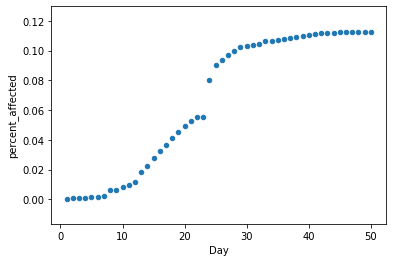

In [32]:
plt=wuhan.plot.scatter('Day','percent_affected')
plt


In [33]:
cruise.tail()

,Day,Confirmed,percent_affected,totalpop
45,46,67592,0.112545,60057550
46,47,67666,0.112669,60057550
47,48,67707,0.112737,60057550
48,49,67743,0.112797,60057550
49,50,67760,0.112825,60057550


In [34]:
wuhan.tail()

,Day,Confirmed,percent_affected,totalpop
45,46,67592,0.112545,60057550
46,47,67666,0.112669,60057550
47,48,67707,0.112737,60057550
48,49,67743,0.112797,60057550
49,50,67760,0.112825,60057550


In [22]:
wuhan=wuhan[['Day','totalpop', 'Confirmed', 'percent_affected']]
cruise=cruise[['Day','totalpop', 'Confirmed', 'percent_affected']]

In [23]:
#######################

In [24]:
wuhan.shape

(48, 4)

In [25]:
wuhan.head()

,Day,totalpop,Confirmed,percent_affected
0,1,60057550,270,0.000450
1,2,60057550,444,0.000739
2,3,60057550,444,0.000739
3,4,60057550,549,0.000914
4,5,60057550,761,0.001267


In [26]:
wuhan.columns

Index(['Day', 'totalpop', 'Confirmed', 'percent_affected'], dtype='object')

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset =cruise
'''X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2].values'''
X=dataset[['Day', 'totalpop']]
y=dataset[['Confirmed']]

In [28]:
X.shape,y.shape

((96, 2), (96, 1))

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#X.reshape(-1,1)
lin_reg.fit(X_train, y_train)
# Visualizing the Linear Regression results
'''def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Affected people in wuhan')
    plt.xlabel('Day')
    plt.ylabel('Number of affected')
    plt.show()
    return
viz_linear()'''

"def viz_linear():\n    plt.scatter(X, y, color='red')\n    plt.plot(X, lin_reg.predict(X), color='blue')\n    plt.title('Affected people in wuhan')\n    plt.xlabel('Day')\n    plt.ylabel('Number of affected')\n    plt.show()\n    return\nviz_linear()"

In [30]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=11)
X_poly = poly_reg.fit_transform(X)
X_test_poly=poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
'''def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Affected people in wuhan')
    plt.xlabel('Day')
    plt.ylabel('Number Affected')
    plt.show()
    return
viz_polymonial()'''

"def viz_polymonial():\n    plt.scatter(X, y, color='red')\n    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')\n    plt.title('Affected people in wuhan')\n    plt.xlabel('Day')\n    plt.ylabel('Number Affected')\n    plt.show()\n    return\nviz_polymonial()"

In [31]:
# Predicting a new result with Linear Regression
lin_reg.predict([[30,3711]])
#output should be 67666


array([[4041.00775491]])

In [32]:
# Predicting a new result with Polymonial Regression
'%f' % pol_reg.predict(poly_reg.fit_transform([[10,984382]]))
#output should be 67666

'725.357851'

In [33]:
68561/67666, 80646/67666

(1.0132267312978454, 1.1918245499955664)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
pol_reg.score(X_test_poly,y_test)

0.9859683496612454

In [36]:
lin_reg.score(X_test,y_test)

0.7390197358560285

In [37]:
float(lin_reg.predict([[100]]))

ValueError: shapes (1,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [38]:
68567/67666

1.0133154021221884

In [39]:
67707/79541

0.8512213826831445